In [1]:
!pip install --upgrade opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 45.3/45.3 MB 3.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

In [4]:
pwd

'C:\\Users\\Admin\\Downloads'

In [ ]:
#Question.no.1.a

In [5]:
trainpath = 'C:/Users/Admin/Desktop/Skin_Cancer/train'
testpath = 'C:/Users/Admin/Desktop/Skin_Cancer/test'

In [6]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


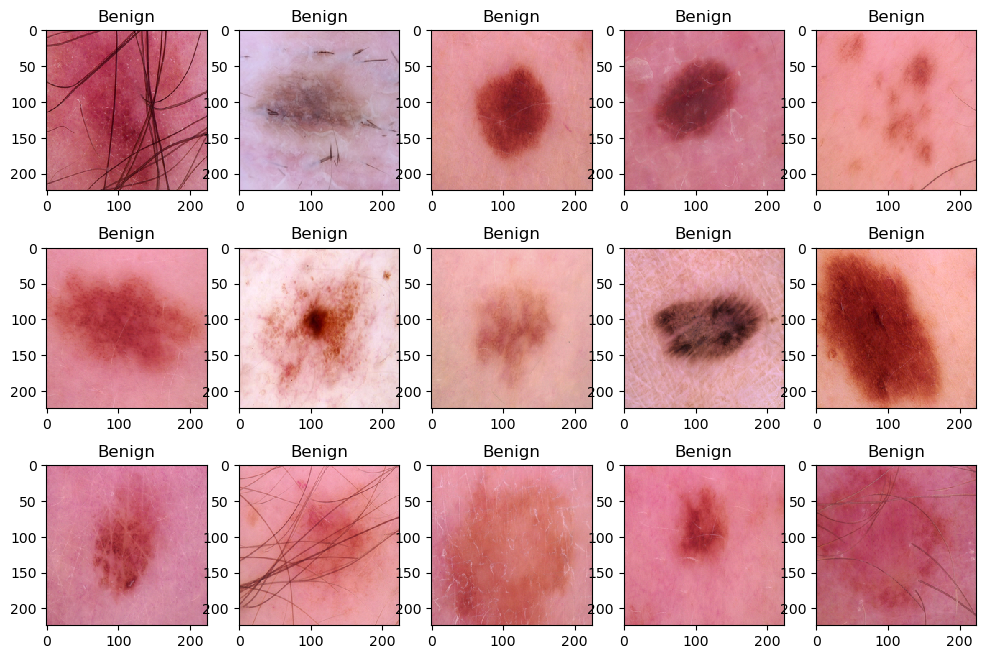

In [7]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [9]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


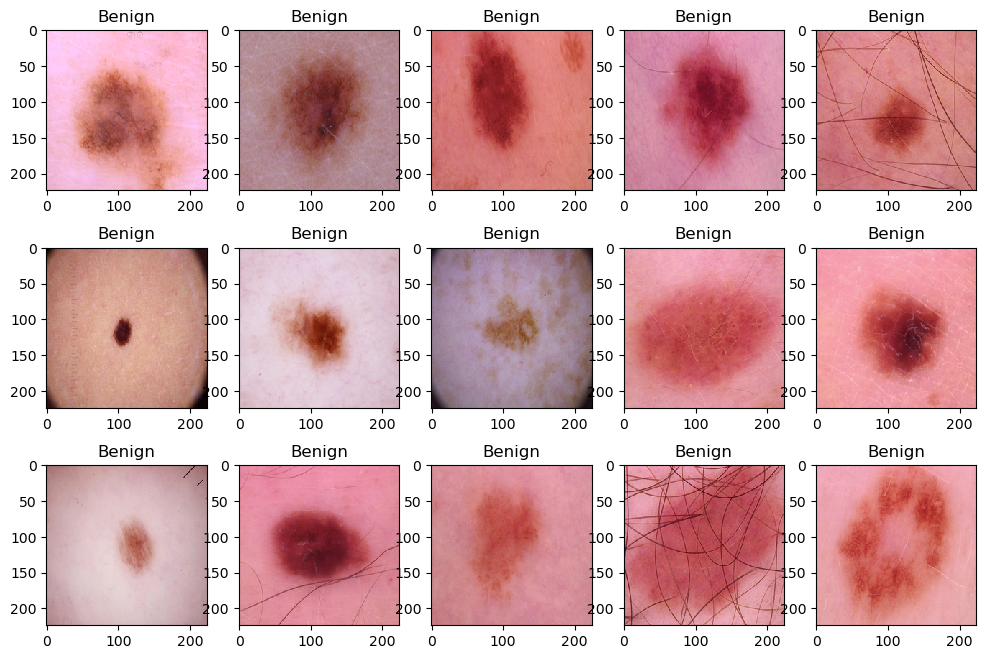

In [10]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [11]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [12]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [13]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [14]:
y_train1.shape,y_test1.shape

((50,), (50,))

In [25]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [26]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [27]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10


10/10 [==============================] - 54s 6s/step - loss: 0.2223 - accuracy: 0.6000 - val_loss: 0.1613 - val_accuracy: 0.8200
Epoch 2/10
10/10 [==============================] - 52s 5s/step - loss: 0.1223 - accuracy: 0.9000 - val_loss: 0.1341 - val_accuracy: 0.7800
Epoch 3/10
10/10 [==============================] - 53s 6s/step - loss: 0.0741 - accuracy: 0.9400 - val_loss: 0.1298 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 53s 6s/step - loss: 0.0543 - accuracy: 0.9600 - val_loss: 0.1148 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 52s 6s/step - loss: 0.0373 - accuracy: 0.9800 - val_loss: 0.1265 - val_accuracy: 0.8400
Epoch 6/10
10/10 [==============================] - 52s 6s/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.8200
Epoch 7/10
10/10 [==============================] - 52s 6s/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.8400
Epoch 8/10
10/10 [

In [ ]:
#QUESTION NO 1.b

In [29]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [30]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 26s 9s/step


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.76


In [ ]:
#QUESTION NO. 1.c

In [34]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG19_model.input, outputs =d3)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [36]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [37]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
10/10 [==============================] - 67s 7s/step - loss: 0.2327 - accuracy: 0.6400 - val_loss: 0.1818 - val_accuracy: 0.7800
Epoch 2/10
10/10 [==============================] - 66s 7s/step - loss: 0.1265 - accuracy: 0.9200 - val_loss: 0.1440 - val_accuracy: 0.8200
Epoch 3/10
10/10 [==============================] - 68s 7s/step - loss: 0.0838 - accuracy: 0.9200 - val_loss: 0.1295 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 68s 7s/step - loss: 0.0600 - accuracy: 0.9600 - val_loss: 0.1269 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 71s 7s/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.1164 - val_accuracy: 0.8200
Epoch 6/10
10/10 [==============================] - 67s 7s/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.1140 - val_accuracy: 0.8200
Epoch 7/10
10/10 [==============================] - 66s 7s/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.8200
Epoch 8/10
10/10 [==

In [40]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)

  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [41]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 34s 12s/step


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.78


In [42]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.86


In [ ]:
#question. no. 2

In [44]:
trainpath = 'C:/Users/Admin/Desktop/Orange_Dataset/train'
testpath = 'C:/Users/Admin/Desktop/Orange_Dataset/test'

In [45]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 30
Entering to the folder name: BlackSpot
Number of images in the folder is 30
Entering to the folder name: Healthy
Number of images in the folder is 30


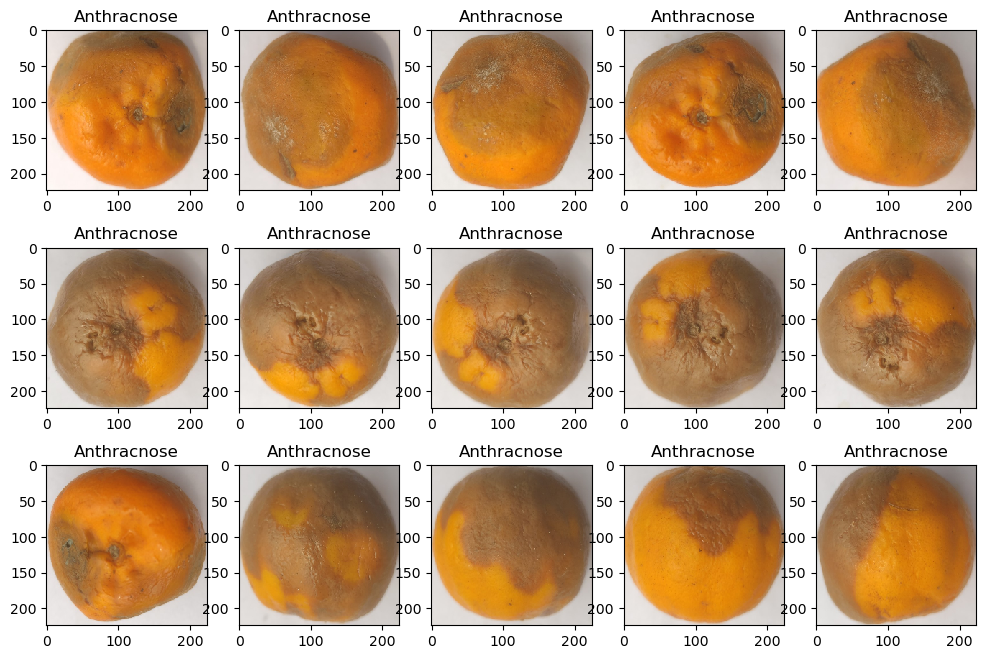

In [47]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    elif train_labels[i] == 1: 
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

In [48]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'Anthracnose':0,'BlackSpot':1,'Healthy':2}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: Anthracnose
Number of images in the folder is 25
Entering to the folder name: BlackSpot
Number of images in the folder is 25
Entering to the folder name: Healthy
Number of images in the folder is 25


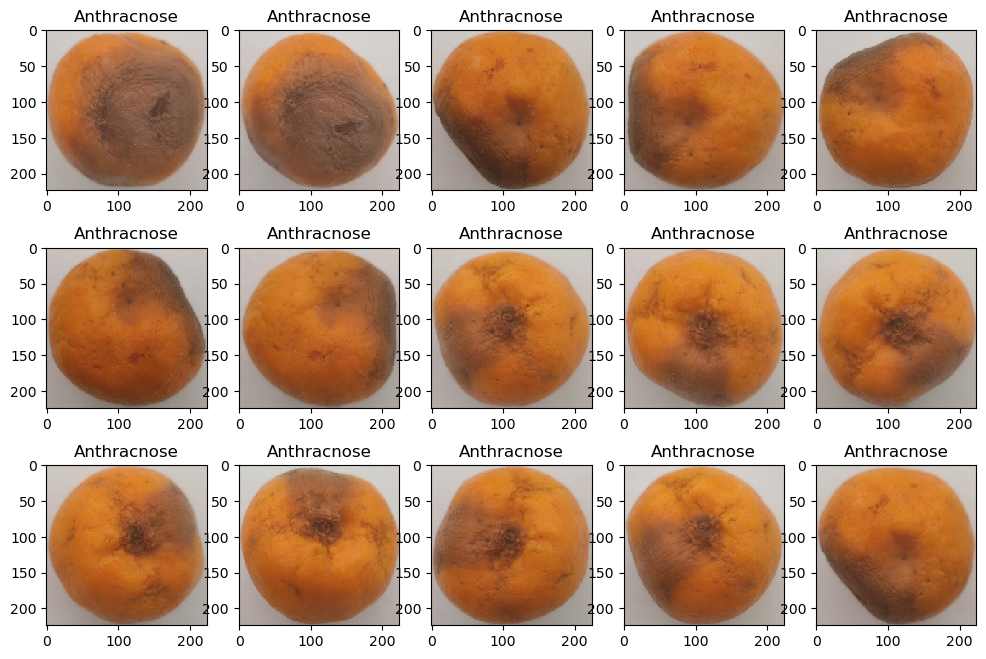

In [49]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Anthracnose')
    elif train_labels[i] == 1: 
        ax.title.set_text('BlackSpot')
    else:
        ax.title.set_text('Healthy')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [50]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [51]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(90, 224, 224, 3)
********************
(90,)
********************
(75, 224, 224, 3)
(75,)


In [52]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [53]:
y_train1.shape,y_test1.shape

((90,), (75,))

In [ ]:
#question. 2.b

In [55]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG_model.input, outputs =d3)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [56]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [57]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 2, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
18/18 [==============================] - 89s 5s/step - loss: 0.1587 - accuracy: 0.7111 - val_loss: 0.0946 - val_accuracy: 0.9867
Epoch 2/2
18/18 [==============================] - 86s 5s/step - loss: 0.0580 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 1.0000


In [58]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [59]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

3/3 [==============================] - 40s 12s/step


In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


In [ ]:
#QUESTION.2.c

In [64]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=64,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=32,kernel_initializer="glorot_uniform", activation='sigmoid')(d1)
  d3=Dense(units=3,kernel_initializer="glorot_uniform", activation='softmax')(d2)
  output = Model(inputs =VGG19_model.input, outputs =d3)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [65]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [66]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 2, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/2
18/18 [==============================] - 114s 6s/step - loss: 0.1116 - accuracy: 0.8333 - val_loss: 0.0443 - val_accuracy: 1.0000
Epoch 2/2
18/18 [==============================] - 112s 6s/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000


In [67]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)

  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [68]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

3/3 [==============================] - 53s 15s/step


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0


In [70]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 1.0
